### Model of Stock Return of Microsoft

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm #for normal distribution

In [3]:
ms = pd.read_csv('C:\\Users\\Computer Care\\Downloads\\Files\\microsoft.csv', index_col = 0)

In [4]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


#### 1. Distribution of logReturn

In [6]:
#Log Dailyreturn to check the probablility
ms['TomorrowCP'] = ms.Close.shift(-1) 
ms["logReturn"] = np.log(ms.TomorrowCP) - np.log(ms.Close)
ms.head()

,Open,High,Low,Close,Adj Close,Volume,TomorrowCP,logReturn
Date,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,46.759998,0.006652
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,46.330002,-0.009238
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,45.650002,-0.014786
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,46.230000,0.012625
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,47.590000,0.028994


0.0008202314861230223 0.014191897388737506


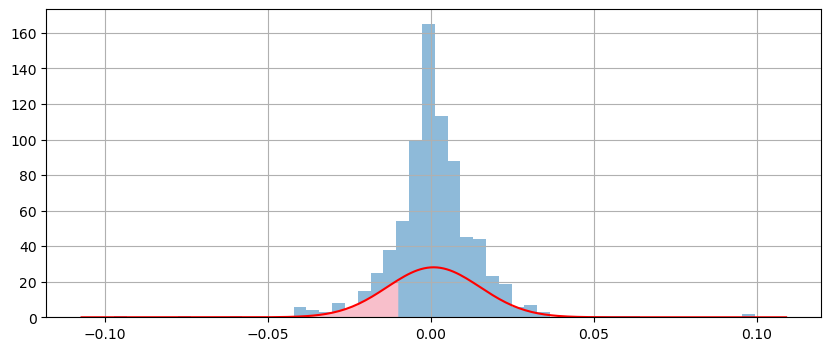

In [7]:
# Plot a histogram to show the distribution of log return of Microsoft's stock.
#computing mean and std from historic data of logreturn
mu = ms.logReturn.mean()
sigma  = ms.logReturn.std(ddof=1)
print(mu, sigma)

density = pd.DataFrame()
density["x"] = np.arange(ms.logReturn.min()-0.01, ms.logReturn.max()+0.01, 0.001) #gives range
density["pdf"] = norm.pdf(density.x, mu , sigma)

ms.logReturn.hist(bins= 50, figsize = (10, 4), alpha = 0.5)
plt.plot(density.x, density.pdf, color='red')
plt.ylim = (0,20),
plt.fill_between(x = np.arange(-0.1, -0.01, 0.0001),
                y2 = 0 ,
                y1 = norm.pdf(np.arange(-0.1, -0.01, 0.0001), mu , sigma),facecolor = 'pink', alpha =0.95)

plt.show()

this is standdard normal varibale whihc is following z distribution
the pink area is losing more than 5% in one day <-5%
Base on the log return of microsoft, we can estimate that we have 0.55% chance of which the daily return is worse than -5%. 

#### 2. Calculate probability of the stock price will drop over a certain percentage

In [8]:
# probability that the stock price of microsoft will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  0.00017118482608677817


In [9]:
# drop over 40% in a year which has 220 trading days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print('The probability of dropping over 40% in 220 days is ', norm.cdf(-0.4, mu220, sigma220))

The probability of dropping over 40% in 220 days is  0.002912363313330548


#### 3. Calculate Value at Risk( VaR)

In [10]:
# Value at risk(VaR)
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk ', VaR)

Single day value at risk  -0.022523362407065


In [11]:
# Quatiles

print('5% quantile ', norm.ppf(0.05, mu, sigma))
print('25% quantile', norm.ppf(0.25, mu, sigma))
print('75% quantile', norm.ppf(0.75, mu, sigma))
print('95% quantile ', norm.ppf(0.95, mu, sigma))


5% quantile  -0.022523362407065
25% quantile -0.008752057838414963
75% quantile 0.010392520810661006
95% quantile  0.024163825379311034


### Estimate the Average Stock Return using CI

In [12]:
# 90% Conidence Interval for LogReturn
sample_size = ms.logReturn.shape[0]                                         # n
sample_mean = ms.logReturn.mean()                                           # xbar
sample_std = ms.logReturn.std(ddof = 1)/ sample_size ** 0.5                 # sigma/sqrt(n)

In [13]:
# left- right quantiles for Z distribution have same magnitude except sign
z_left = norm.ppf(0.05)                                                    # z(apha/2)
z_right = norm.ppf(0.95)                                                   # z 1-(alpha/2)

In [14]:
# upper - lower boundries
left_interval = sample_mean + z_left * sample_std
right_interval = sample_mean + z_right * sample_std

In [15]:
# Confidence interval tells you that there will be 90% chance that the average stock return lies between "left and right intervals"
print('90% confidence interval is ', (left_interval, right_interval))

90% confidence interval is  (-1.560325389937862e-05, 0.001656066226145423)


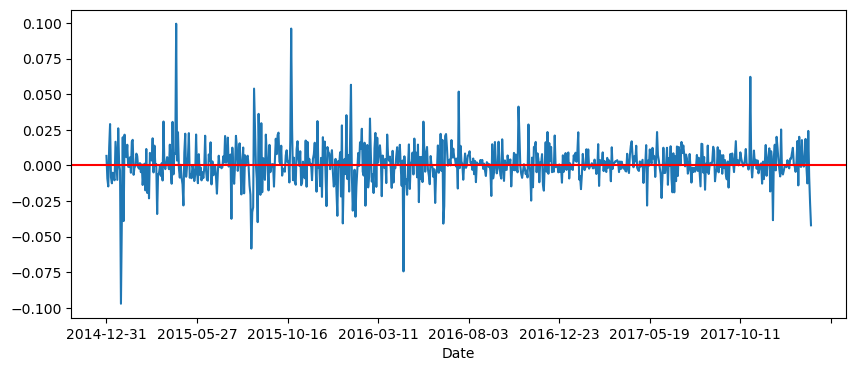

In [16]:
# Log return goes up and down during the period
ms.logReturn.plot(figsize = (10,4))
plt.axhline(y=0, color = 'red')
plt.show()
# daily return direcltly gives positive and neagtive trends

### Hypothesis Testing

#### 1. Set Hypothesis

$H_0 : \mu = 0$ 
$H_a : \mu \neq 0$

* $H_0$ means avg stock is 0
* $H_a$ means avg stock is not 0

#### 2. Test Statistics

In [19]:
# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion, mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/ sample_std
zhat

1.6141477140003675

#### 3. Set Decision Criteria

In [20]:
alpha = 0.05                                                  # 5% chance to reject null wrongly
z_left = norm.ppf(alpha/2, 0, 1)
z_right = -z_left                                             # z_dist is symmetric
z_left, z_right

(-1.9599639845400545, 1.9599639845400545)

#### 4. Make Decision. Shall we reject or accept hypothesis?

In [21]:
print('At significant level of', alpha)
print('Shall we reject:', zhat>z_right or zhat<z_left)

At significant level of 0.05
Shall we reject: False


#### Recheck Decision Criteria using P-value

In [22]:
p = 1 - norm.cdf(zhat, 0, 1)
print('At significant level of',alpha)
print('Shall we reject:', p < alpha)

At significant level of 0.05
Shall we reject: False


##### We accepted null hypthosis means Average stock price is to zero, our conclusion maybe wrong but only 5% chance to be wrong.We conclude that average stock return is not obvious be positive.